loan_id


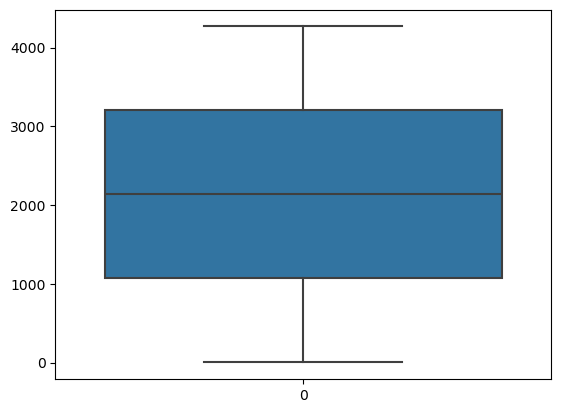

 no_of_dependents


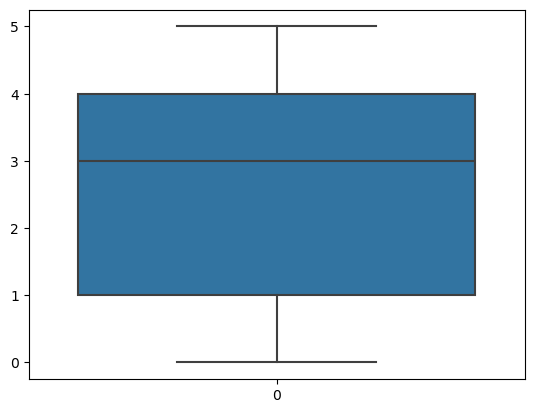

 income_annum


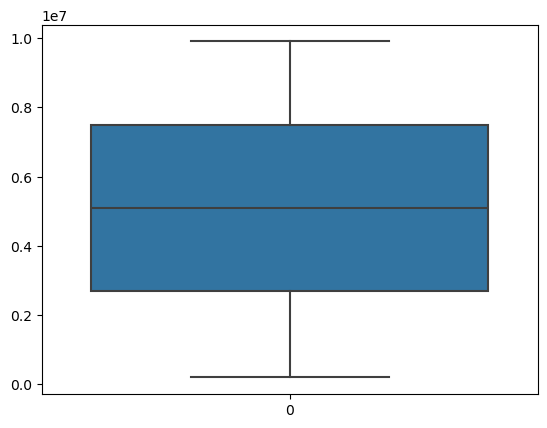

 loan_amount


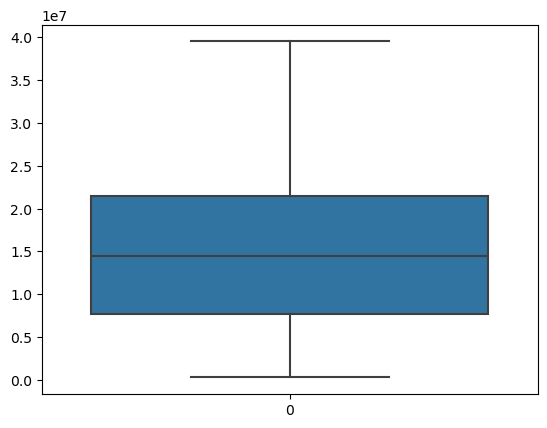

 loan_term


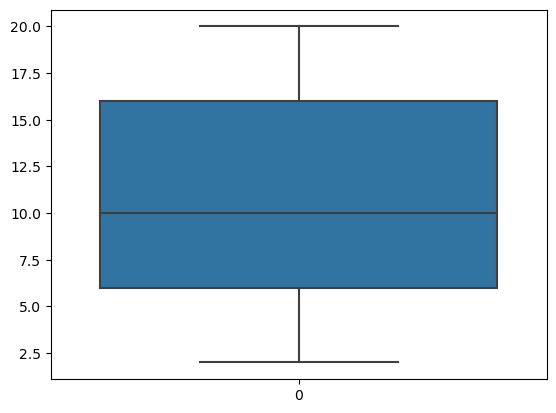

 cibil_score


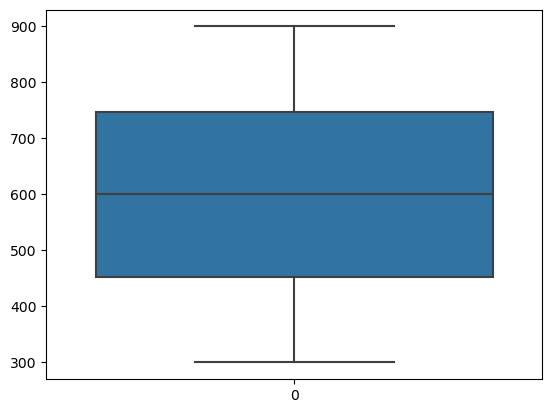

 residential_assets_value


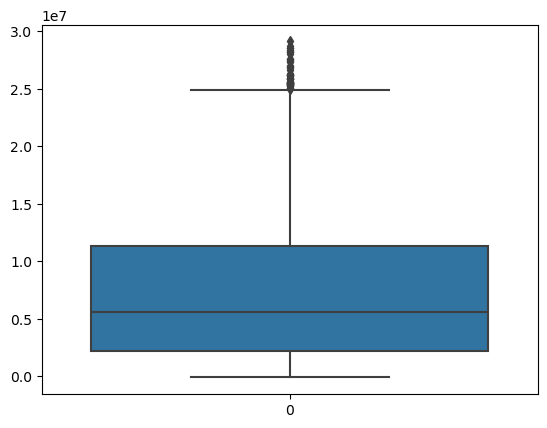

 commercial_assets_value


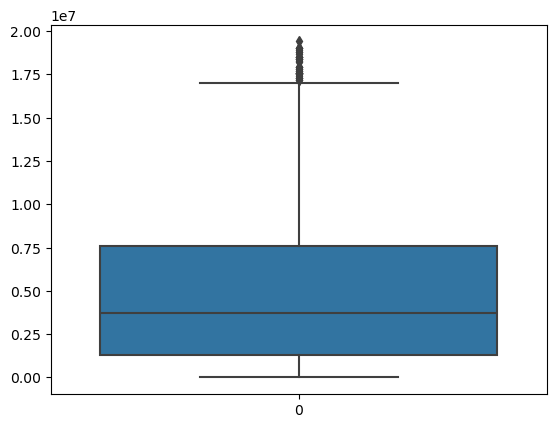

 luxury_assets_value


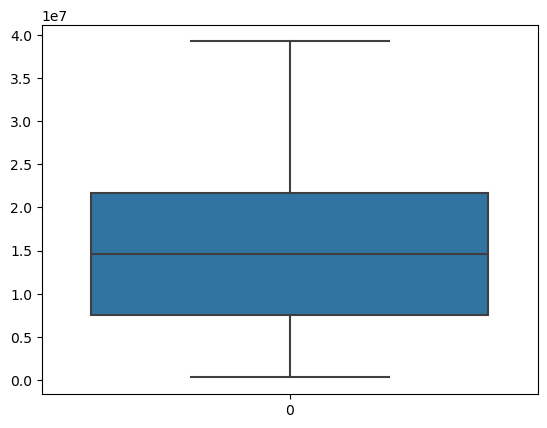

 bank_asset_value


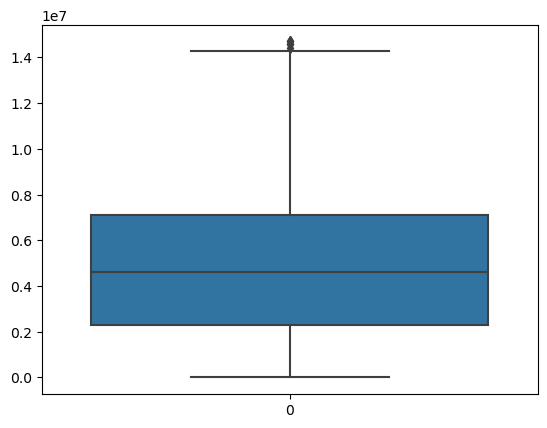

[' education', ' self_employed', ' loan_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4269 non-null   int64  
 1    no_of_dependents          4269 non-null   int64  
 2    education                 4269 non-null   int32  
 3    self_employed             4269 non-null   float64
 4    income_annum              4269 non-null   int64  
 5    loan_amount               4269 non-null   int64  
 6    loan_term                 4269 non-null   int64  
 7    cibil_score               4269 non-null   int64  
 8    residential_assets_value  4269 non-null   int64  
 9    commercial_assets_value   4269 non-null   int64  
 10   luxury_assets_value       4269 non-null   int64  
 11   bank_asset_value          4269 non-null   int64  
 12   loan_status               4269 non-null   int32  
dtyp

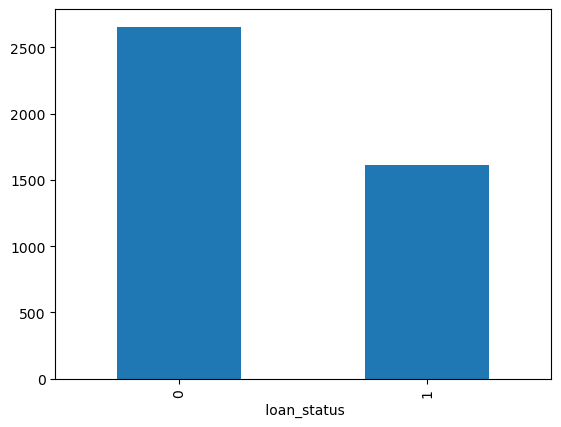

In [3]:

# required lib of process
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


df=pd.read_csv(r"E:\Feature engineering\loan_approval_dataset.csv")
nal=[]
objl=[]
nobj=[]

# find the nan
for i in df.columns:
    if df[i].isna().sum()==0:
        nal.append(i)

# fill the nan
for x in nal:
    if df[x].dtypes == "int64" or df[x].dtypes == 'int':
        df[x].fillna(df[x].mode(),inplace=True)
        nobj.append(x)
    elif df[x].dtypes == "float" or df[x].dtypes == 'float':
        df[x].fillna(df[x].mean().round(),inplace=True)
        nobj.append(x)
    else:
        df[x].fillna(df[x].mode(),inplace=True)
        objl.append(x)

# check error or error detection
for i in nobj:
    print(i)
    plt.boxplot(df[i])
    sns.boxplot(df[i])
    plt.show()

# encoded the catagorical data into numerical format
print(objl)
ord=OrdinalEncoder()
ord.fit(df[[' education']])
ary=ord.transform(df[[' education']])
df[' education']=ary.astype('int')
ohe = OneHotEncoder(drop='first')
ohe.fit(df[[' self_employed']])
ary1 = ohe.transform(df[[' self_employed']]).toarray()
df[' self_employed']=ary1
lab=LabelEncoder()
lab.fit(df[' loan_status'])
ary22=lab.transform(df[' loan_status'])
ary2 = pd.DataFrame(ary22)
df[' loan_status']=ary2

# checking of conversion into numerical data
df.info()
df

# splinting of data on the bases of independent or dependent columns
from sklearn.model_selection import train_test_split
x=df.drop(' loan_status', axis=1)
y=df[' loan_status']
print(x.shape,y.shape)

# check the imbalacing of dependent columns
y
y.value_counts().unique()
print(y.value_counts().plot(kind='bar'))

# if therir is imbalncing in the data then 
# 1) increase the data 
from imblearn.over_sampling import RandomOverSampler
# 2) decrease the data 
from imblearn.under_sampling import RandomUnderSampler
ros=RandomOverSampler()
rus=RandomUnderSampler()
xros,yros=ros.fit_resample(x,y)
print(yros.value_counts())
xrus,yrus=rus.fit_resample(x,y)
print(yrus.value_counts())

# train the model and test the model  and got the max score 
xtrain,xtest,ytrain,ytest=train_test_split(xros,yros,test_size=0.25)

dt=DecisionTreeClassifier()
rdc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
sv=SVC()

model=[dt,rdc,ada,gbc,knn,lr,sv]

rus_sc=[]
for i in model:
    print("Random Over Smpling",i)
    i.fit(xtrain,ytrain)
    score=i.score(xtest,ytest)
    print(i,"==",score)
    rus_sc.append(score)
    print("************************************")
m=max(rus_sc)

print("The biggest score by using ROS",model[rus_sc.index(m)],"  ==  ",m)
print("****************------------------------------------------********************")

x_train,x_test,y_train,y_test=train_test_split(xrus,yrus,test_size=0.25)

sc=[]
for i in model:
    print("Random Under Sampling",i)
    i.fit(x_train,y_train)
    sco=i.score(x_test,y_test)
    print(i,"==",sco)
    sc.append(sco)
    print("************************************")
mm=max(sc)
print("The biggest score by using RUS",model[sc.index(mm)],"  ==  ",mm)

